In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch
from matplotlib import rcParams
from matplotlib.colors import to_rgb

import cv2, os

from hangul.read_data import load_data
from hangul.variables import label_df
from hangul import style

In [2]:
fname = '/storage/hangul/h5s/NanumGothic/NanumGothic_500.h5'
imgs, labels, _, _, _ = load_data(fname)
init = label_df['initial_geometry']
med = label_df['medial_geometry']
fin = label_df['final_geometry']

In [3]:
def add_contour(blank, img, contour, color):
    for ii in range(img.shape[0]):
        for jj in range(img.shape[1]):
            include = cv2.pointPolygonTest(contour, (jj, ii), False)
            if include >= 0:
                blank[ii, jj, 3] = img[ii, jj] / 255
                blank[ii, jj, :3] = np.array(to_rgb(color))
    return

def find_contours(img):
    _, thresh = cv2.threshold(img, 1, 255, 0)
    _, contours, _ = cv2.findContours(thresh, 1, 1)
    return contours

def imshow_axes(imgs, idxs, axes):
    for idx, ax in zip(idxs, axes):
        ax.imshow(imgs[idx], cmap='gray_r', extent=[0, 1, 0, 1])
        ax.set_xticks([])
        ax.set_yticks([])
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)

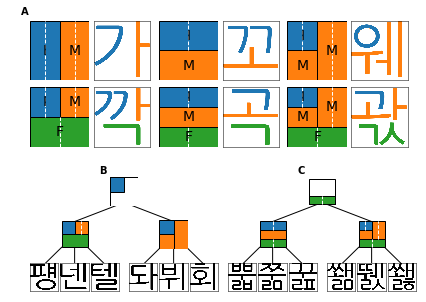

In [7]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
lw = 1
fs = 14

figsize=(5.5, 4)
fig = plt.figure(figsize=figsize)


rect_w = .15
le = .025
re = .0
be = .01
vg = .025
te = .05
rect_h = rect_w *figsize[0] / figsize[1]
block_w = (1 - le - re - 3 * rect_w) / 3
start_y = 1 - te - 2 * rect_h - vg
dx = rect_w + block_w
dy = (rect_h + vg)

raxes = []
iaxes = []
for ii in range(2):
    for jj in range(3):
        ax = fig.add_axes([le + jj * dx,
                         start_y + (1-ii) * dy,
                         rect_w,
                         rect_h])
        raxes.append(ax)
        ax = fig.add_axes([1.05 * rect_w + le + jj * dx,
                         start_y + (1 - ii) * dy,
                         rect_w,
                         rect_h])
        iaxes.append(ax)

ax = raxes[0]
ax.add_patch(Rectangle((0, 0), .5, 1, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((.5, 0), .5, 1, fc=colors[1], ec='k', lw=lw))
ax.plot([.25, .25], [0, 1], '--', c='white', lw=lw)
ax.plot([.75, .75], [0, 1], '--', c='white', lw=lw)
ax.text(.25, .5, 'I', fontsize=fs, ha='center', va='center')
ax.text(.75, .5, 'M', fontsize=fs, ha='center', va='center')
label = np.array([[0, 0, 0]])
idx = np.argmax(np.prod(labels == label, axis=1))
ax=iaxes[0]
img = imgs[idx]
contours = find_contours(img)
blank = np.zeros(img.shape + (4,))
add_contour(blank, img, contours[0], colors[0])
add_contour(blank, img, contours[1], colors[1])
ax.imshow(blank)


ax = raxes[1]
ax.add_patch(Rectangle((0, .5), 1, .5, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), 1, .5, fc=colors[1], ec='k', lw=lw))
ax.plot([.5, .5], [.5, 1], '--', c='white', lw=lw)
ax.text(.5, .75, 'I', fontsize=fs, ha='center', va='center')
ax.text(.5, .25, 'M', fontsize=fs, ha='center', va='center')
label = np.array([[1, 8, 0]])
idx = np.argmax(np.prod(labels == label, axis=1))
ax=iaxes[1]
img = imgs[idx]
contours = find_contours(img)
blank = np.zeros(img.shape + (4,))
add_contour(blank, img, contours[0], colors[1])
add_contour(blank, img, contours[1], colors[0])
add_contour(blank, img, contours[2], colors[0])
ax.imshow(blank)

ax = raxes[2]
ax.add_patch(Rectangle((0, .5), .5, .5, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), .5, .5, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((.5, 0), .5, 1, fc=colors[1], ec='k', lw=lw))
ax.plot([.25, .25], [.5, 1], '--', c='white', lw=lw)
ax.plot([.75, .75], [0, 1], '--', c='white', lw=lw)
ax.text(.25, .75, 'I', fontsize=fs, ha='center', va='center')
ax.text(.25, .25, 'M', fontsize=fs, ha='center', va='center')
ax.text(.75, .5, 'M', fontsize=fs, ha='center', va='center')
label = np.array([[11, 15, 0]])
idx = np.argmax(np.prod(labels == label, axis=1))
ax=iaxes[2]
img = imgs[idx]
contours = find_contours(img)
blank = np.zeros(img.shape + (4,))
add_contour(blank, img, contours[2], colors[0])
add_contour(blank, img, contours[0], colors[1])
add_contour(blank, img, contours[1], colors[1])
add_contour(blank, img, contours[3], colors[1])
add_contour(blank, img, contours[4], colors[1])
ax.imshow(blank)

ax = raxes[3]
ax.add_patch(Rectangle((0, .5), .5, .5, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((.5, .5), .5, .5, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), 1, .5, fc=colors[2], ec='k', lw=lw))
ax.plot([.25, .25], [.5, 1], '--', c='white', lw=lw)
ax.plot([.75, .75], [.5, 1], '--', c='white', lw=lw)
ax.plot([.5, .5], [0, .5], '--', c='white', lw=lw)
ax.text(.25, .75, 'I', fontsize=fs, ha='center', va='center')
ax.text(.75, .75, 'M', fontsize=fs, ha='center', va='center')
ax.text(.5, .25, 'F', fontsize=fs, ha='center', va='center')
label = np.array([[1, 0, 1]])
idx = np.argmax(np.prod(labels == label, axis=1))
ax=iaxes[3]
img = imgs[idx]
contours = find_contours(img)
blank = np.zeros(img.shape + (4,))
add_contour(blank, img, contours[0], colors[2])
add_contour(blank, img, contours[1], colors[0])
add_contour(blank, img, contours[2], colors[0])
add_contour(blank, img, contours[3], colors[1])
ax.imshow(blank)

ax = raxes[4]
ax.add_patch(Rectangle((0, 2/3), 1, 1/3, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 1/3), 1, 1/3, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), 1, 1/3, fc=colors[2], ec='k', lw=lw))
ax.plot([.5, .5], [2/3, 1], '--', c='white', lw=lw)
ax.plot([.5, .5], [0, 1/3], '--', c='white', lw=lw)
ax.text(.5, 5/6, 'I', fontsize=fs, ha='center', va='center')
ax.text(.5, 1/2, 'M', fontsize=fs, ha='center', va='center')
ax.text(.5, 1/6, 'F', fontsize=fs, ha='center', va='center')
label = np.array([[0, 8, 1]])
idx = np.argmax(np.prod(labels == label, axis=1))
ax=iaxes[4]
img = imgs[idx]
contours = find_contours(img)
blank = np.zeros(img.shape + (4,))
add_contour(blank, img, contours[0], colors[2])
add_contour(blank, img, contours[1], colors[1])
add_contour(blank, img, contours[2], colors[0])
ax.imshow(blank)

ax = raxes[5]
ax.add_patch(Rectangle((0, 2/3), .5, 1/3, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 1/3), .5, 1/3, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((.5, 1/3), .5, 2/3, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), 1, 1/3, fc=colors[2], ec='k', lw=lw))
ax.plot([.25, .25], [2/3, 1], '--', c='white', lw=lw)
ax.plot([.75, .75], [1/3, 1], '--', c='white', lw=lw)
ax.plot([.5, .5], [0, 1/3], '--', c='white', lw=lw)
ax.text(.25, 5/6, 'I', fontsize=fs, ha='center', va='center')
ax.text(.25, 1/2, 'M', fontsize=fs, ha='center', va='center')
ax.text(.75, 2/3, 'M', fontsize=fs, ha='center', va='center')
ax.text(.5, 1/6, 'F', fontsize=fs, ha='center', va='center')
label = np.array([[0, 9, 3]])
idx = np.argmax(np.prod(labels == label, axis=1))
ax=iaxes[5]
img = imgs[idx]
contours = find_contours(img)
blank = np.zeros(img.shape + (4,))
add_contour(blank, img, contours[0], colors[2])
add_contour(blank, img, contours[1], colors[2])
add_contour(blank, img, contours[2], colors[1])
add_contour(blank, img, contours[3], colors[0])
add_contour(blank, img, contours[4], colors[1])
ax.imshow(blank)

for ax in raxes:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
for ax in iaxes:
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(0.5)
"""
-------------------------------------------------------------
"""
num = 12
idxs = np.array([[0, 1, 1], [0, 3, 0], [1, 2, 2], [1, 4, 2],])
shg = .005
lhg = .025
vg = .05
w = (1 - le - re - 3 * lhg - 8 * shg) / 12.
h = w * figsize[0] / figsize[1]

axest = np.empty(2, dtype=object)
for ii in range(2):
    axest[ii] = fig.add_axes([le + (lhg + 2*shg + 3*w) * (2*ii + 1) - (lhg + w) / 2., be + 2*(vg + h),
                             w, h])
ax = axest[0]
ax.add_patch(Rectangle((0, 0), 1, 1, fc='w', ec='k', lw=lw))
ax.add_patch(Rectangle((0, .5), .5, .5, fc=colors[0], ec='k', lw=lw))
ax.axis('off')

ax = axest[1]
ax.add_patch(Rectangle((0, 0), 1, 1, fc='w', ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), 1, 1./3, fc=colors[2], ec='k', lw=lw))
ax.plot([.5, .5], [0, 1./3], '--', c='white', lw=lw)
ax.axis('off')


axesm = np.empty(4, dtype=object)
for ii in range(4):
    grp = ii
    val = 1
    axesm[ii] = fig.add_axes([le + (lhg + 2*shg + 3*w) * grp + (shg + w) * val, be + vg + h,
                             w, h])
ax = axesm[0]
ax.add_patch(Rectangle((0, .5), .5, .5, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((.5, .5), .5, .5, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), 1, .5, fc=colors[2], ec='k', lw=lw))
ax.plot([.75, .75], [.5, 1], '--', c='white', lw=lw)
ax.axis('off')

ax = axesm[1]
ax.add_patch(Rectangle((0, .5), .5, .5, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), .5, .5, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((.5, 0), .5, 1, fc=colors[1], ec='k', lw=lw))
ax.axis('off')

ax = axesm[2]
ax.add_patch(Rectangle((0, 2/3), 1, 1/3, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 1/3), 1, 1/3, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), 1, 1/3, fc=colors[2], ec='k', lw=lw))
ax.plot([.5, .5], [2/3, 1], '--', c='white', lw=lw)
ax.plot([.5, .5], [0, 1/3], '--', c='white', lw=lw)
ax.axis('off')

ax = axesm[3]
ax.add_patch(Rectangle((0, 2/3), .5, 1/3, fc=colors[0], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 1/3), .5, 1/3, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((.5, 1/3), .5, 2/3, fc=colors[1], ec='k', lw=lw))
ax.add_patch(Rectangle((0, 0), 1, 1/3, fc=colors[2], ec='k', lw=lw))
ax.plot([.25, .25], [2/3, 1], '--', c='white', lw=lw)
ax.plot([.75, .75], [1/3, 1], '--', c='white', lw=lw)
ax.plot([.5, .5], [0, 1/3], '--', c='white', lw=lw)
ax.axis('off')

axesb = np.empty(num, dtype=object)
for ii in range(num):
    grp = ii // 3
    val = ii % 3
    axesb[ii] = fig.add_axes([le + (lhg + 2*shg + 3*w) * grp + (shg + w) * val, be,
                             w, h])
rng = np.random.RandomState(0)
my_idxs = np.zeros(num, dtype=int)
for ii, vals in enumerate(idxs):
    i, j, k = vals
    ids = (init == i) & (med == j) & (fin == k)
    my_idxs[ii*3:(ii+1)*3] = rng.choice(np.where(ids)[0], size=3, replace=False)

imshow_axes(imgs, my_idxs, axesb)


for ii, ax in enumerate(axesb):
    group = ii // 3
    val = ii % 3
    arrow = ConnectionPatch((.5, .95), (.5 + (val - 1)*.45, 0.05),
                            'axes fraction', 'axes fraction',
                            axesb[ii], axesm[group], zorder=-100)
    fig.add_artist(arrow)

for ii, ax in enumerate(axesm):
    group = ii //2
    val = ii % 2
    arrow = ConnectionPatch((.5, .95), (1./3. + val/3., 0.05),
                            'axes fraction', 'axes fraction',
                            axesm[ii], axest[group], zorder=-100)
    fig.add_artist(arrow)

y = .42
fig.text(.0025, .97, 'A', **style.panel_letter_fontstyle)
fig.text(.2, y, 'B', **style.panel_letter_fontstyle)
fig.text(.7, y, 'C', **style.panel_letter_fontstyle)

plt.savefig('hierarchy.pdf', dpi=300)
plt.savefig('hierarchy.png', dpi=300)

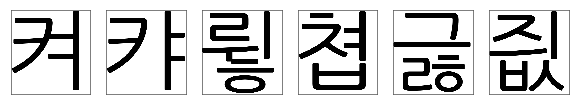

In [6]:
rng = np.random.RandomState(0)

init = label_df['initial_geometry']
med = label_df['medial_geometry']
fin = label_df['final_geometry']
idxs = init == 0
n = 6
fig, axes = plt.subplots(1, n, figsize=(10, 3))

myidxs = rng.choice(np.where(np.logical_and(idxs, fin == 0))[0], size=2, replace=False)
imshow_axes(imgs, myidxs, axes[:2])

myidxs = rng.choice(np.where(np.logical_and(idxs, fin == 1))[0], size=2, replace=False)
imshow_axes(imgs, myidxs, axes[2:4])

myidxs = rng.choice(np.where(np.logical_and(idxs, fin == 2))[0], size=2, replace=False)
imshow_axes(imgs, myidxs, axes[-2:])

In [22]:
w

0.04750000000000001